In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

In [3]:
deaths = pd.read_csv("/Users/celinepham/Documents/IRONHACK/FINAL_PROJECT/fatal_shooting_by_police_2019_2023.csv")
income = pd.read_csv("/Users/celinepham/Documents/IRONHACK/FINAL_PROJECT/median_house_income_2019_2023.csv")
edu = pd.read_csv("/Users/celinepham/Documents/IRONHACK/FINAL_PROJECT/people_completed_highschool.csv")
poverty = pd.read_csv("/Users/celinepham/Documents/IRONHACK/FINAL_PROJECT/poverty_population_2019_2023.csv")
race = pd.read_csv("/Users/celinepham/Documents/IRONHACK/FINAL_PROJECT/state_population_by_race_2019_2023.csv")

**Fatal shooting by Police from 2019-2023**

In [192]:
deaths

,name,age,gender,race,date,state,manner_of_death,mental_illness,armed,weapon,threat_level,body_camera
0,Javier Flores,39,male,other_race,2023-12-31,NV,shot,False,armed,gun,attack,True
1,Steven Clark Jr,41,male,white_alone,2023-12-31,FL,shot,False,armed,gun,attack,False
2,Benjamin McDaniel,30,male,other_race,2023-12-31,AR,shot,False,armed,knife,attack,False
3,Talmadge Bryant,35,male,other_race,2023-12-31,FL,shot,False,armed,gun,attack,False
4,Ornela Morgan,43,female,white_alone,2023-12-30,NY,shot,False,unarmed,unarmed,other,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5852,Abdoulaye Thiam,20,male,black_alone,2019-01-02,TN,shot,False,armed,knife,other,True
5853,Arron Thomas Lambert,33,male,white_alone,2019-01-02,TX,shot,False,armed,Other,attack,False
5854,Matthew Burroughs,35,male,black_alone,2019-01-02,OH,shot,False,vehicle,vehicle,attack,False
5855,Dylan Michael Smith,26,male,white_alone,2019-01-01,NC,shot,False,armed,gun,attack,False


Dates and week days

In [193]:
deaths['date'] = pd.to_datetime(deaths['date'])

Analyse the weekend

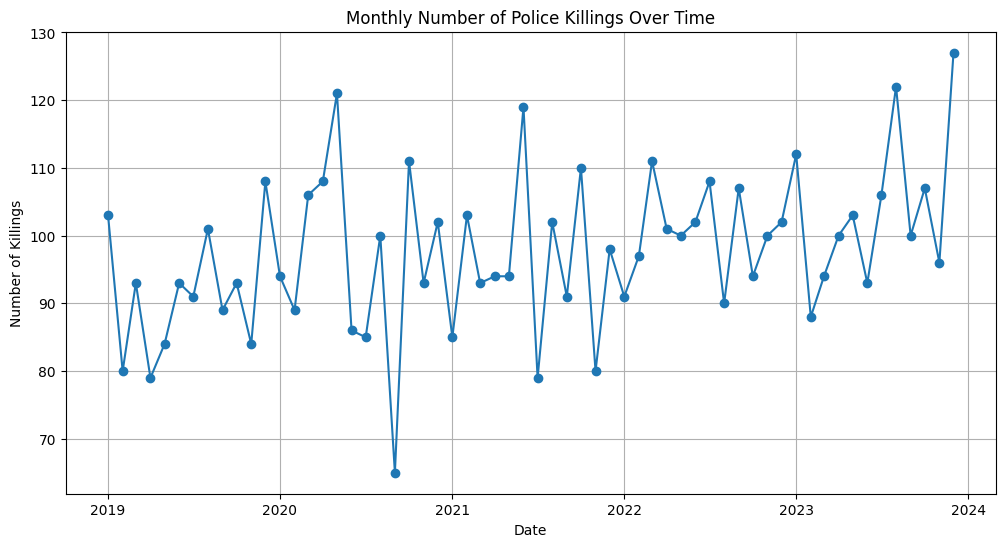

In [194]:
# Group data by year and month to identify trends over time
monthly_killings = deaths.groupby(deaths['date'].dt.to_period('M')).size()

# Convert PeriodIndex to datetime for plotting purposes
monthly_killings.index = monthly_killings.index.to_timestamp()


plt.figure(figsize=(12, 6))
plt.plot(monthly_killings.index, monthly_killings.values, marker='o', linestyle='-')
plt.title("Monthly Number of Police Killings Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Killings")
plt.grid(True)
plt.show()

Analyse Weed-day and Week-end

/var/folders/9z/k5tvnzx17sb0wxf4lrs5qkwm0000gp/T/ipykernel_30297/97116642.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=ax, palette='muted')
/var/folders/9z/k5tvnzx17sb0wxf4lrs5qkwm0000gp/T/ipykernel_30297/97116642.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.0%}'.format(y) for y in ax.get_yticks()])


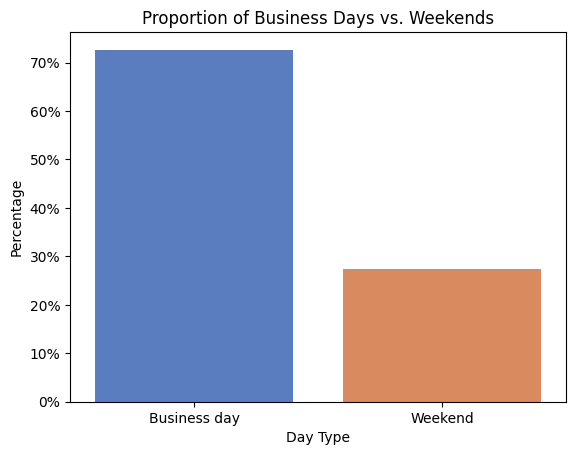

In [195]:
count = deaths['date'].apply(lambda x: 'Business day' if x.dayofweek < 5 else 'Weekend').value_counts(normalize=True)

# Create the bar plot
f, ax = plt.subplots(1, 1)
sns.barplot(x=count.index, y=count.values, ax=ax, palette='muted')

# Set axis labels and title
ax.set_xlabel("Day Type")
ax.set_ylabel("Percentage")
ax.set_title("Proportion of Business Days vs. Weekends")
ax.set_yticklabels(['{:.0%}'.format(y) for y in ax.get_yticks()])

plt.show()

Cases for each day of week

/var/folders/9z/k5tvnzx17sb0wxf4lrs5qkwm0000gp/T/ipykernel_30297/1562560295.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=ax, palette='muted')
/var/folders/9z/k5tvnzx17sb0wxf4lrs5qkwm0000gp/T/ipykernel_30297/1562560295.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.0%}'.format(y) for y in ax.get_yticks()])


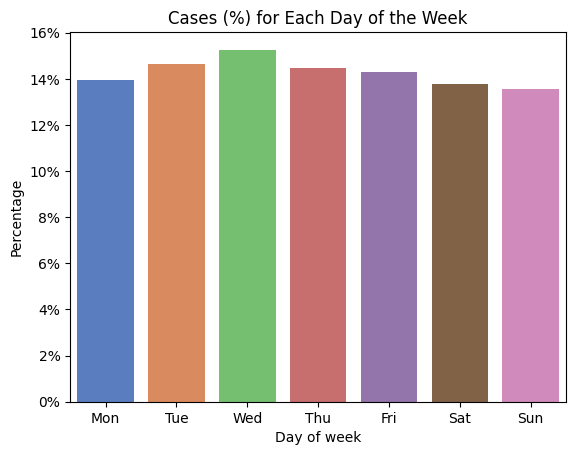

In [196]:
# Calculate normalized counts of cases by day of the week
count = deaths['date'].apply(lambda x: x.dayofweek).value_counts(normalize=True).sort_index()

# Rename the index to days of the week
count.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Create the bar plot
f, ax = plt.subplots(1, 1)
sns.barplot(x=count.index, y=count.values, ax=ax, palette='muted')

# Set plot title and y-axis label
ax.set_title('Cases (%) for Each Day of the Week')
ax.set_xlabel('Day of week')
ax.set_ylabel('Percentage')

# Format y-axis as percentages
ax.set_yticklabels(['{:.0%}'.format(y) for y in ax.get_yticks()])

plt.show()

Analyse age distribution, relationsip between age_agroup and race, manner_of_death, armed

/var/folders/9z/k5tvnzx17sb0wxf4lrs5qkwm0000gp/T/ipykernel_30297/3769856126.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(tick)}%' for tick in plt.gca().get_yticks()])


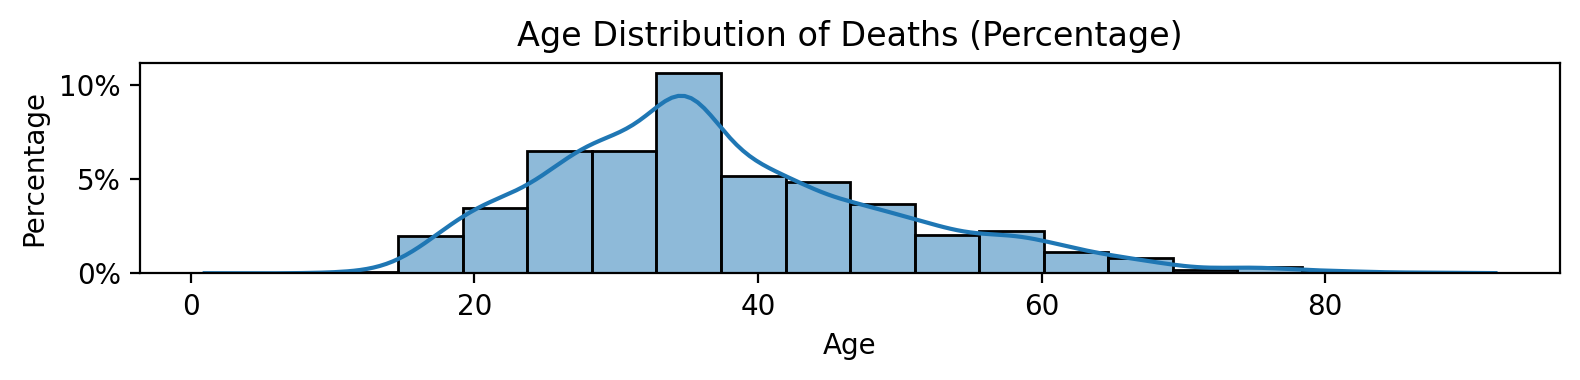

In [197]:
plt.figure(figsize=(8, 2), dpi=200)
sns.histplot(data=deaths, x='age', bins=20, kde=True, stat="percent")

plt.title("Age Distribution of Deaths (Percentage)")
plt.xlabel("Age")
plt.ylabel("Percentage")

# Set y-axis labels to display as percentages
plt.gca().set_yticklabels([f'{int(tick)}%' for tick in plt.gca().get_yticks()])

plt.tight_layout()
plt.show()


In [198]:
def age_group(row):
    if row < 18:
        return "teenager"
    elif row <35:
        return "young_adult"
    elif row <50:
        return "adult"
    elif row <65:
        return "old_adult"
    else:
        return "elder"
     

deaths["age_group"] = deaths["age"].apply(age_group)


/var/folders/9z/k5tvnzx17sb0wxf4lrs5qkwm0000gp/T/ipykernel_30297/1996735725.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=deaths, x='manner_of_death', y='age', palette='muted')


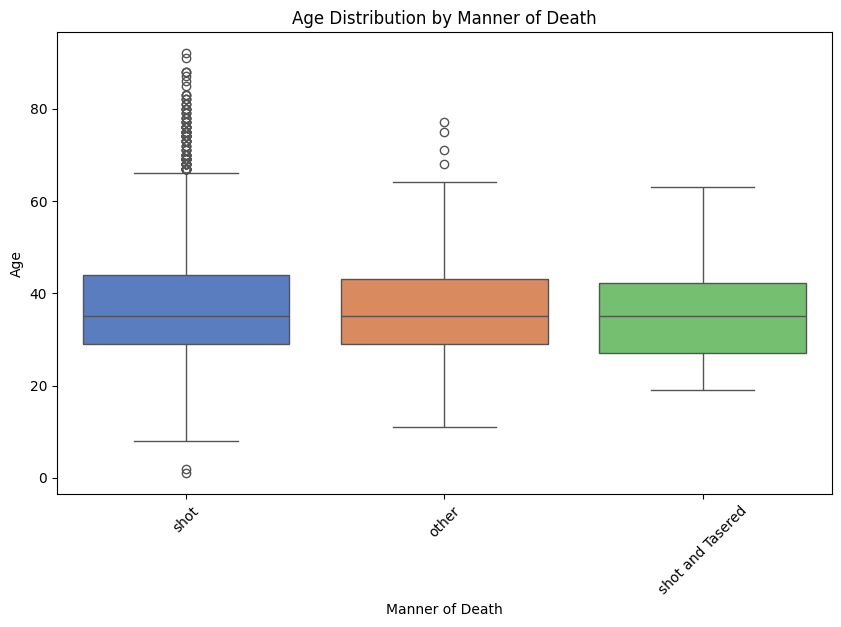

In [199]:
# Now, let's plot the relationship between 'age_group' and 'manner_of_death'
plt.figure(figsize=(10, 6))
sns.boxplot(data=deaths, x='manner_of_death', y='age', palette='muted')

# Set titles and labels
plt.title('Age Distribution by Manner of Death')
plt.xlabel('Manner of Death')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()



Let's see about gender

/var/folders/9z/k5tvnzx17sb0wxf4lrs5qkwm0000gp/T/ipykernel_30297/8926621.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=deaths, x='gender', palette='muted')


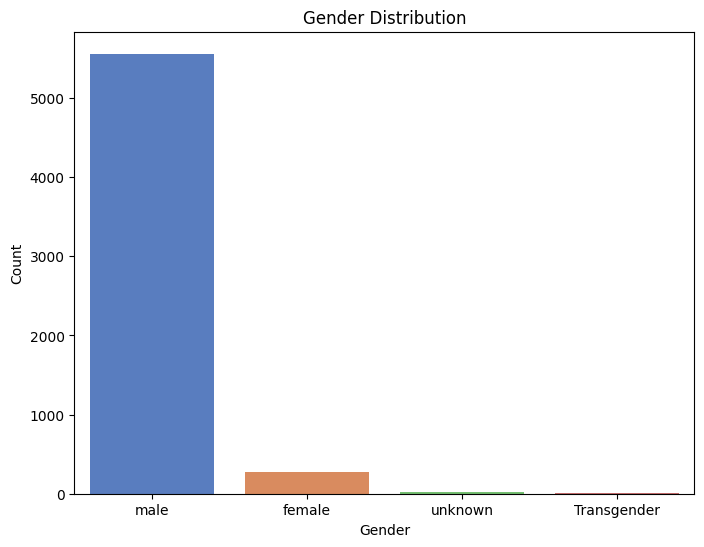

In [200]:
plt.figure(figsize=(8, 6))
sns.countplot(data=deaths, x='gender', palette='muted')

# Set titles and labels for clarity
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.show()

<Figure size 1000x600 with 0 Axes>

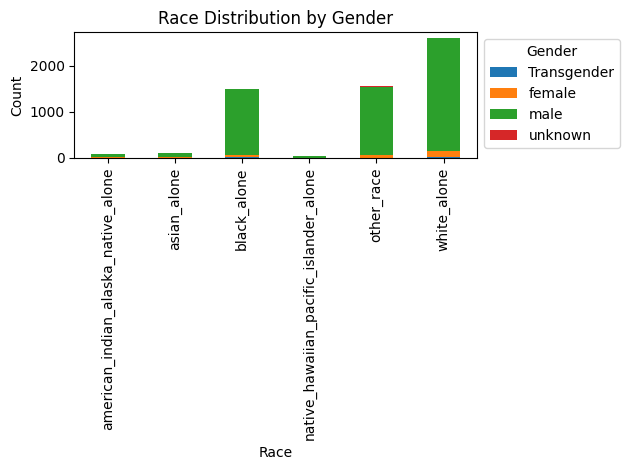

<Figure size 1000x600 with 0 Axes>

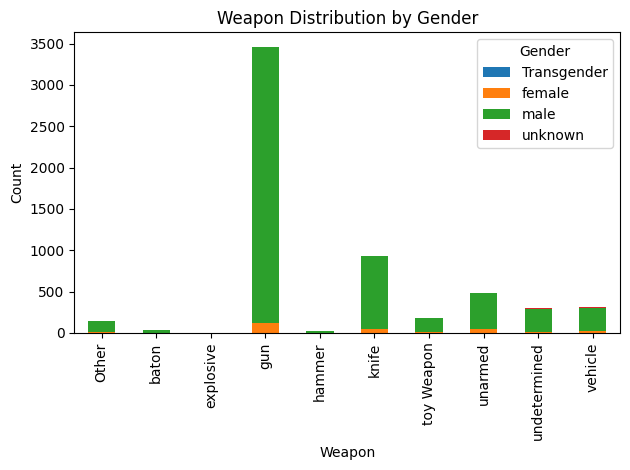

In [201]:
race_gender_counts = deaths.groupby(['race', 'gender']).size().unstack()
weapon_gender_counts = deaths.groupby(['weapon', 'gender']).size().unstack()

# First stacked bar chart: Race distribution by gender with blue shades
plt.figure(figsize=(10, 6))
race_gender_counts.plot(kind='bar', stacked=True)  # Different shades of blue
plt.title('Race Distribution by Gender')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Gender', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Second stacked bar chart: Weapon distribution by gender with blue shades
plt.figure(figsize=(10, 6))
weapon_gender_counts.plot(kind='bar', stacked=True)
plt.title('Weapon Distribution by Gender')
plt.xlabel('Weapon')
plt.ylabel('Count')
plt.legend(title='Gender', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

People killed by Race

/var/folders/9z/k5tvnzx17sb0wxf4lrs5qkwm0000gp/T/ipykernel_30297/2467843431.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(w['age'], ax=axes, shade=True, color='#F5DEB3', label='White Alone')
/var/folders/9z/k5tvnzx17sb0wxf4lrs5qkwm0000gp/T/ipykernel_30297/2467843431.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(b['age'], ax=axes, shade=True, color='#3D2B1F', label='Black Alone')
/var/folders/9z/k5tvnzx17sb0wxf4lrs5qkwm0000gp/T/ipykernel_30297/2467843431.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(a['age'], ax=axes, shade=True, color='#FFD700', label='Asian Alone')
/var/folders/9z/k5tvnzx17sb0wxf4lr

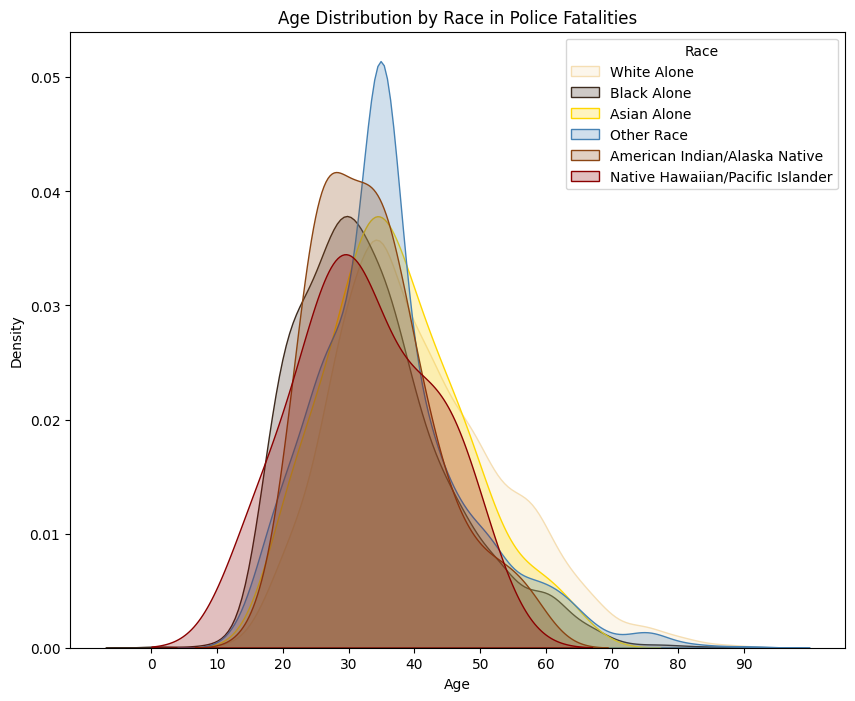

In [202]:

# Filter data by race
w = deaths[deaths['race'] == 'white_alone']
b = deaths[deaths['race'] == 'black_alone']
a = deaths[deaths['race'] == 'asian_alone']
o = deaths[deaths['race'] == 'other_race']
ai = deaths[deaths['race'] == 'american_indian_alaska_native_alone']
nh = deaths[deaths['race'] == 'native_hawaiian_pacific_islander_alone']

# Set up the figure
fig, axes = plt.subplots(1, 1, figsize=(10, 8))
axes.xaxis.set_ticks(np.arange(0, 100, 10))  # Optional: age ticks

# Plot KDE for each race, specifying the age column
sns.kdeplot(w['age'], ax=axes, shade=True, color='#F5DEB3', label='White Alone')
sns.kdeplot(b['age'], ax=axes, shade=True, color='#3D2B1F', label='Black Alone')
sns.kdeplot(a['age'], ax=axes, shade=True, color='#FFD700', label='Asian Alone')
sns.kdeplot(o['age'], ax=axes, shade=True, color='#4682B4', label='Other Race')
sns.kdeplot(ai['age'], ax=axes, shade=True, color='#8B4513', label='American Indian/Alaska Native')
sns.kdeplot(nh['age'], ax=axes, shade=True, color='#8B0000', label='Native Hawaiian/Pacific Islander')

# Adding legend title and labels
axes.legend(title="Race")
plt.title("Age Distribution by Race in Police Fatalities")
plt.xlabel("Age")
plt.ylabel("Density")

# Show plot
plt.show()


**Which state is most dangerous**

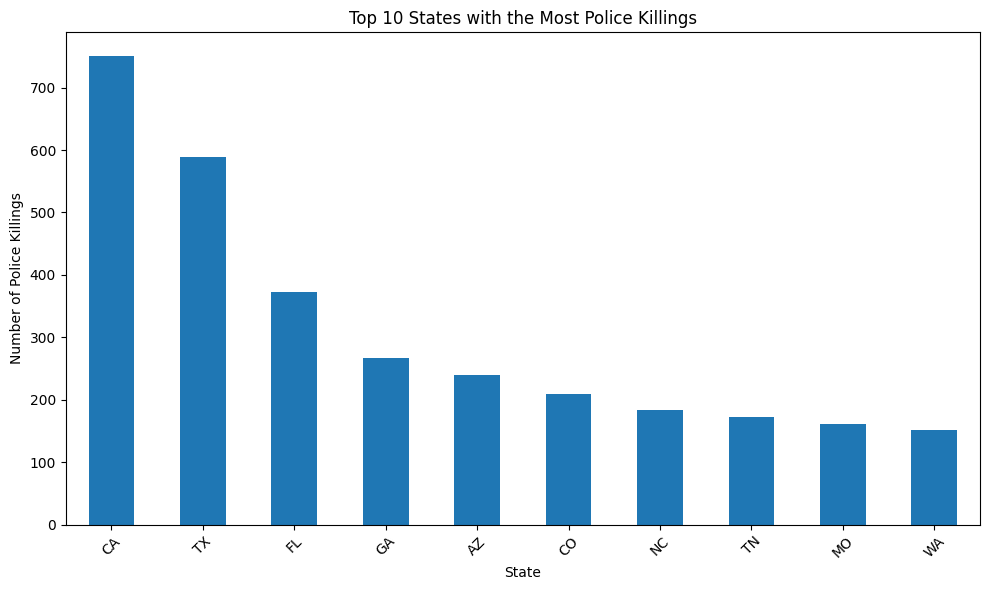

In [203]:
top_states = deaths['state'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_states.plot(kind='bar')
plt.title('Top 10 States with the Most Police Killings')
plt.xlabel('State')
plt.ylabel('Number of Police Killings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Index(['CA', 'TX', 'FL', 'GA', 'AZ', 'CO', 'NC', 'TN', 'MO', 'WA'], dtype='object', name='state')
                          name  age gender         race       date state  \
1              Steven Clark Jr   41   male  white_alone 2023-12-31    FL   
3              Talmadge Bryant   35   male   other_race 2023-12-31    FL   
8                Connor Amador   20   male  white_alone 2023-12-29    CA   
14         Kalob Douglas Watts   21   male  white_alone 2023-12-27    MO   
16                Robert Brown   28   male   other_race 2023-12-27    CA   
...                        ...  ...    ...          ...        ...   ...   
5850  Abiel Innis De Joel Rios   33   male   other_race 2019-01-03    CA   
5852           Abdoulaye Thiam   20   male  black_alone 2019-01-02    TN   
5853      Arron Thomas Lambert   33   male  white_alone 2019-01-02    TX   
5855       Dylan Michael Smith   26   male  white_alone 2019-01-01    NC   
5856    Brandon Lovell Webster   28   male  black_alone 2019-01-01

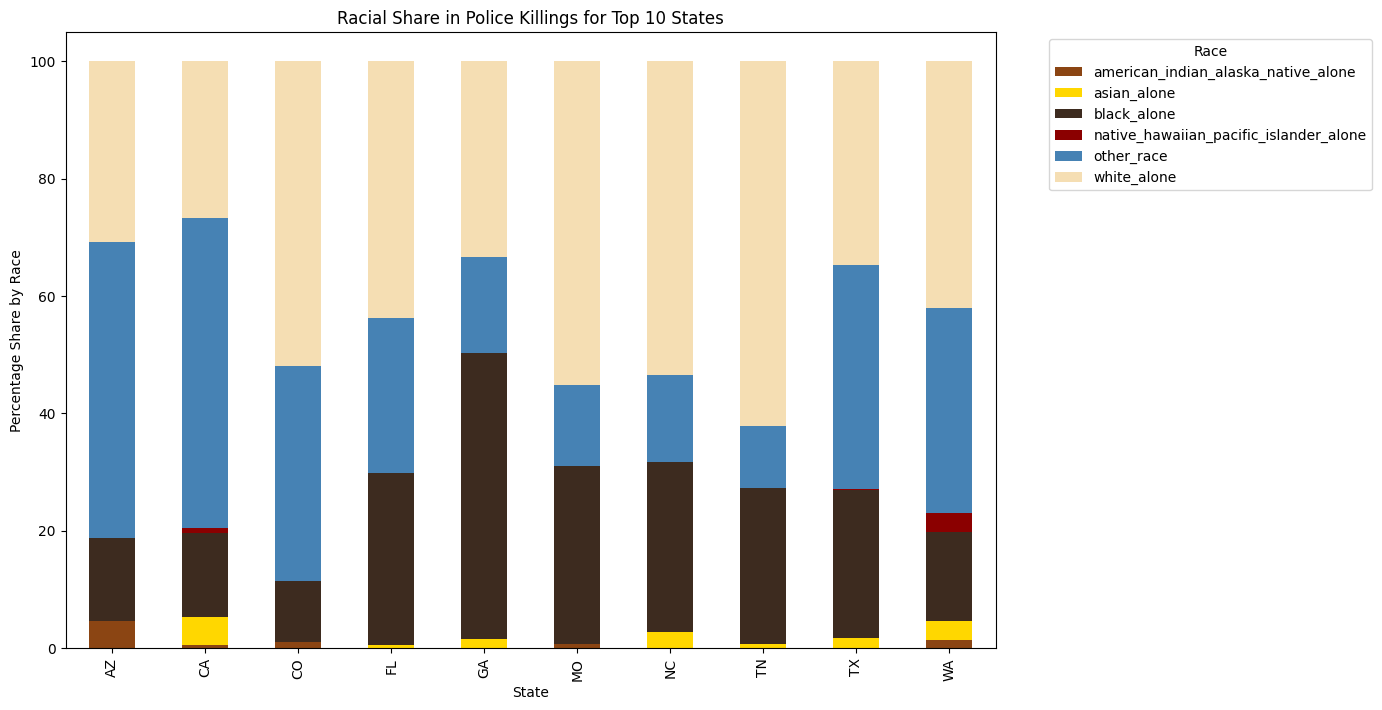

In [204]:
top_states = deaths['state'].value_counts().nlargest(10).index
print(top_states)

# Filter data to only include these top 10 states
top_states_data = deaths[deaths['state'].isin(top_states)]
print(top_states_data)

# Calculate the share of each race within these states
race_share = top_states_data.groupby(['state', 'race']).size().unstack(fill_value=0)
print(race_share)

# Normalize by total counts to get racial share percentages within each state
race_share_percentage = race_share.div(race_share.sum(axis=1), axis=0) * 100


race_colors = {
    'american_indian_alaska_native_alone': '#8B4513',  # SaddleBrown
    'asian_alone': '#FFD700',  # Gold (Yellow)
    'black_alone': '#3D2B1F',  # Dark brown
    'native_hawaiian_pacific_islander_alone': '#8B0000',  # Dark Red
    'other_race': '#4682B4',  # SteelBlue
    'white_alone': '#F5DEB3'   # Wheat
}

# Plotting with final color adjustments
race_share_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), color=[race_colors[race] for race in race_share.columns])
plt.title('Racial Share in Police Killings for Top 10 States')
plt.xlabel('State')
plt.ylabel('Percentage Share by Race')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

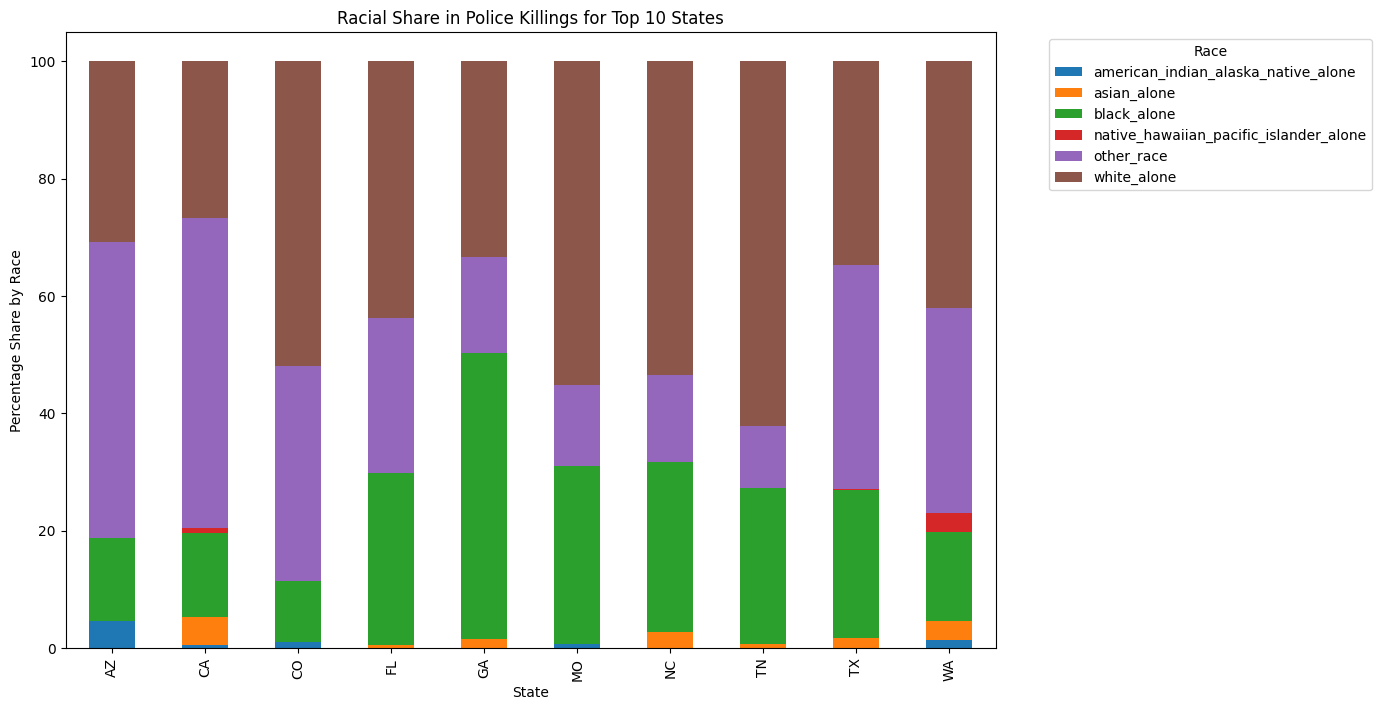

In [205]:
# Normalize by total counts to get racial share percentages within each state
race_share_percentage = race_share.div(race_share.sum(axis=1), axis=0) * 100

# Plotting the racial share in police killings for the top 10 states
race_share_percentage.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Racial Share in Police Killings for Top 10 States')
plt.xlabel('State')
plt.ylabel('Percentage Share by Race')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Were people armed

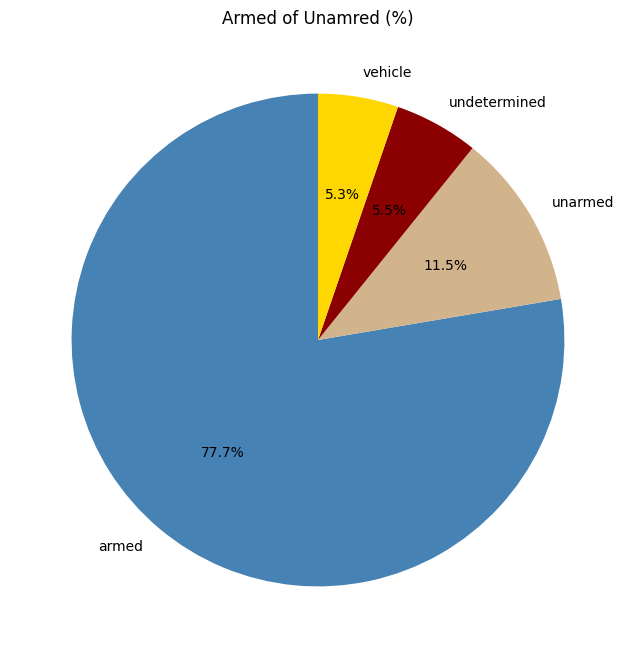

In [206]:
armed_distribution = deaths['armed'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
armed_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#4682B4', '#D2B48C', '#8B0000', '#FFD700', '#3D2B1F'])
plt.title('Armed of Unamred (%)')
plt.ylabel('')  # Remove y-axis label for a cleaner look
plt.show()

In [207]:
deaths['weapon'].value_counts()

weapon
gun             3464
knife            929
unarmed          487
vehicle          308
undetermined     301
toy Weapon       175
Other            142
baton             29
hammer            19
explosive          3
Name: count, dtype: int64

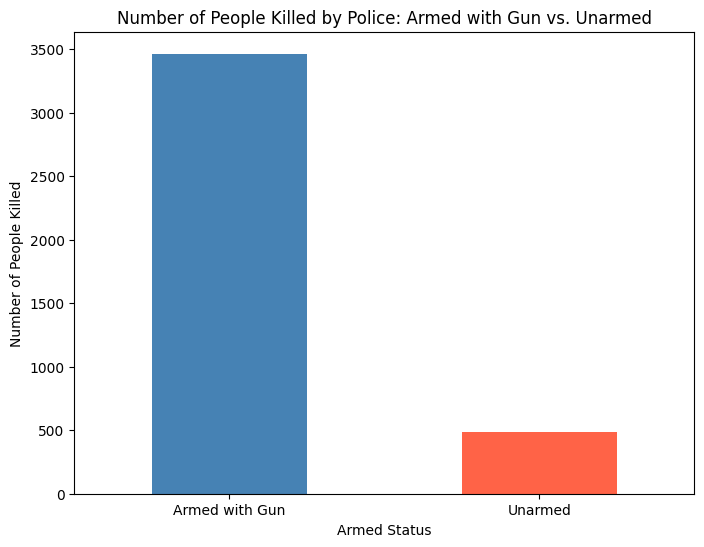

In [208]:
# Filter to categorize only 'gun' as "Armed with Gun" and 'unarmed' as "Unarmed"
deaths['armed_status'] = deaths['weapon'].apply(lambda x: 'Armed with Gun' if x == 'gun' else ('Unarmed' if x == 'unarmed' else None))

# Drop rows where 'armed_status' is None (i.e., other weapons)
filtered_data = deaths.dropna(subset=['armed_status'])

# Count occurrences of each armed status category
armed_status_counts_filtered = filtered_data['armed_status'].value_counts()

# Plotting the data
plt.figure(figsize=(8, 6))
armed_status_counts_filtered.plot(kind='bar', color=['#4682B4', '#FF6347'])  # Blue for armed with gun, Red for unarmed
plt.title('Number of People Killed by Police: Armed with Gun vs. Unarmed')
plt.xlabel('Armed Status')
plt.ylabel('Number of People Killed')
plt.xticks(rotation=0)
plt.show()

Mental illness

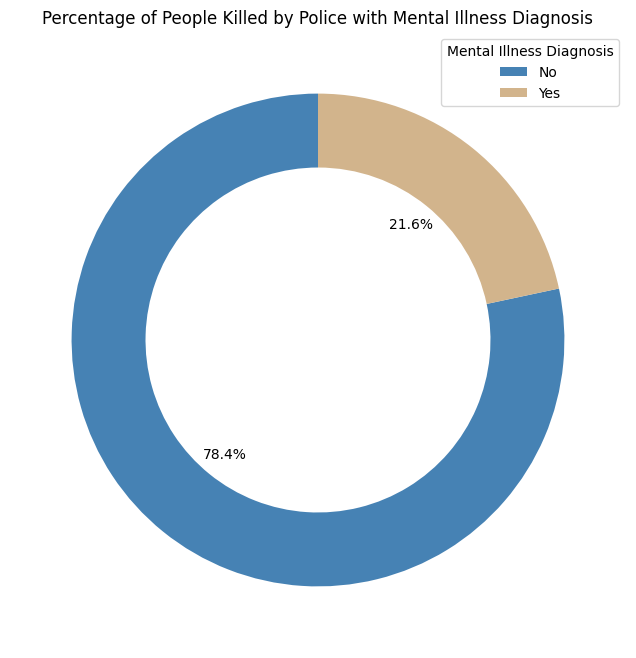

In [209]:
mental_illness_counts = deaths['mental_illness'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(mental_illness_counts, labels=['', ''], autopct='%1.1f%%', startangle=90, colors=['#4682B4', '#D2B48C'], wedgeprops=dict(width=0.3))

# Adding a legend
plt.legend(['No', 'Yes'], title='Mental Illness Diagnosis', loc="best")
plt.title('Percentage of People Killed by Police with Mental Illness Diagnosis')
plt.show()

****

**A/B Testing**

In [4]:
df = pd.read_csv('/Users/celinepham/Documents/IRONHACK/FINAL_PROJECT/relationship_social_fatal.csv')

In [13]:
df.sort_values(by='shooting_rate_percentage', ascending=False)

,state,year,poverty_rate_percentage,high_school_completion_percent,median_house_income,total_shootings,total_population,shooting_rate_percentage
69,ID,2023,227.178,282.574,382202,14,27327,0.051
134,MT,2023,158.049,143.629,137305,7,14126,0.050
164,NM,2023,173.714,142.645,282225,23,72808,0.032
229,UT,2023,180.700,150.504,1011650,20,72379,0.028
4,AK,2023,59.366,96.131,94437,7,39472,0.018
...,...,...,...,...,...,...,...,...
46,FL,2020,10.498,13.089,58466800,97,21216900,0.000
155,NJ,2019,2.963,3.360,677850,13,8878500,0.000
156,NJ,2020,7.355,11.316,68512900,11,8885420,0.000
157,NJ,2021,3.399,3.314,750238,11,9234020,0.000


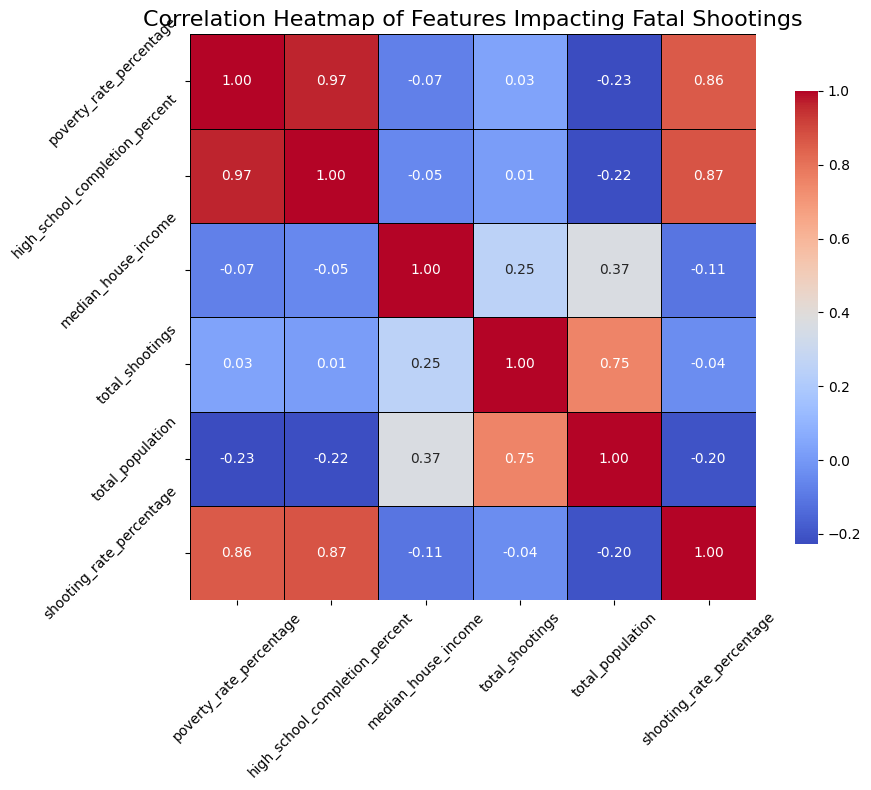

In [228]:
#Heatmap

# Dropping the 'year' and 'state' columns for correlation analysis
data_for_correlation = df.drop(columns=['year', 'state'])

# Calculating the correlation matrix
correlation_matrix = data_for_correlation.corr()
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, 
            cbar_kws={"shrink": .8}, linewidths=0.5, linecolor='black')

# Set titles and labels
plt.title('Correlation Heatmap of Features Impacting Fatal Shootings', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()

# Show the heatmap
plt.show()


5.878
Hypothesis 1: Poverty Rate and Shooting Rates
Mean Shooting Rate (High Poverty): 0.30960%
Mean Shooting Rate (Low Poverty): 0.03016%
T-Statistic: 4.03
P-Value: 9.70760e-05
Interpretation: We reject the null hypothesis, indicating a significant relationship between poverty rates and shooting rates.


/var/folders/9z/k5tvnzx17sb0wxf4lrs5qkwm0000gp/T/ipykernel_50449/3503712168.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='poverty_group', y='shooting_rate_percentage', data=df, ci=None)


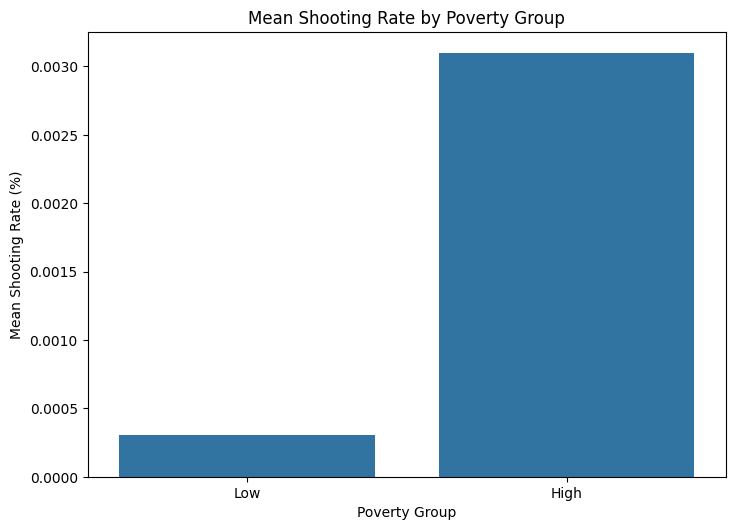

In [14]:

# Step 1: Categorize the data
median_poverty_rate = df['poverty_rate_percentage'].median()
df['poverty_group'] = np.where(df['poverty_rate_percentage'] > median_poverty_rate, 'High', 'Low')

median_shooting_rate = df['shooting_rate_percentage'].median()
df['shooting_rate_group'] = np.where(df['shooting_rate_percentage'] > median_shooting_rate, 'High', 'Low')

# Step 2: A/B Testing with T-Tests
# Hypothesis 1: Poverty Rate vs Shooting Rate
high_poverty_shooting_rate = df[df['poverty_group'] == 'High']['shooting_rate_percentage']
low_poverty_shooting_rate = df[df['poverty_group'] == 'Low']['shooting_rate_percentage']

t_test_poverty = stats.ttest_ind(high_poverty_shooting_rate, low_poverty_shooting_rate, equal_var=False)


# Step 4: Print Results
# T-Test Results
print("Hypothesis 1: Poverty Rate and Shooting Rates")
print(f"Mean Shooting Rate (High Poverty): {high_poverty_shooting_rate.mean():.5%}")
print(f"Mean Shooting Rate (Low Poverty): {low_poverty_shooting_rate.mean():.5%}")
print(f"T-Statistic: {t_test_poverty.statistic:.2f}")
print(f"P-Value: {t_test_poverty.pvalue:.5e}")
print("Interpretation: We reject the null hypothesis, indicating a significant relationship between poverty rates and shooting rates.")





# Step 6: Plotting the Results
plt.figure(figsize=(14, 10))

# 1. Bar plot for Poverty Rate vs Shooting Rate
plt.subplot(2, 2, 1)
sns.barplot(x='poverty_group', y='shooting_rate_percentage', data=df, ci=None)
plt.title('Mean Shooting Rate by Poverty Group')
plt.ylabel('Mean Shooting Rate (%)')
plt.xlabel('Poverty Group')


# Adjust layout
plt.tight_layout()
plt.show()


In [20]:
bl = pd.read_csv('/Users/celinepham/Documents/IRONHACK/FINAL_PROJECT/black_only.csv')

In [21]:
bl

,state,year,poverty_population,total_black_cases
0,CA,2023,4654020,21
1,CA,2022,4654020,14
2,CA,2021,4654020,21
3,CA,2020,4654020,27
4,CA,2019,4654020,25
...,...,...,...,...
942,DE,2020,14009,1
943,DE,2019,14009,1
944,WY,2022,7641,2
945,WY,2022,6779,2


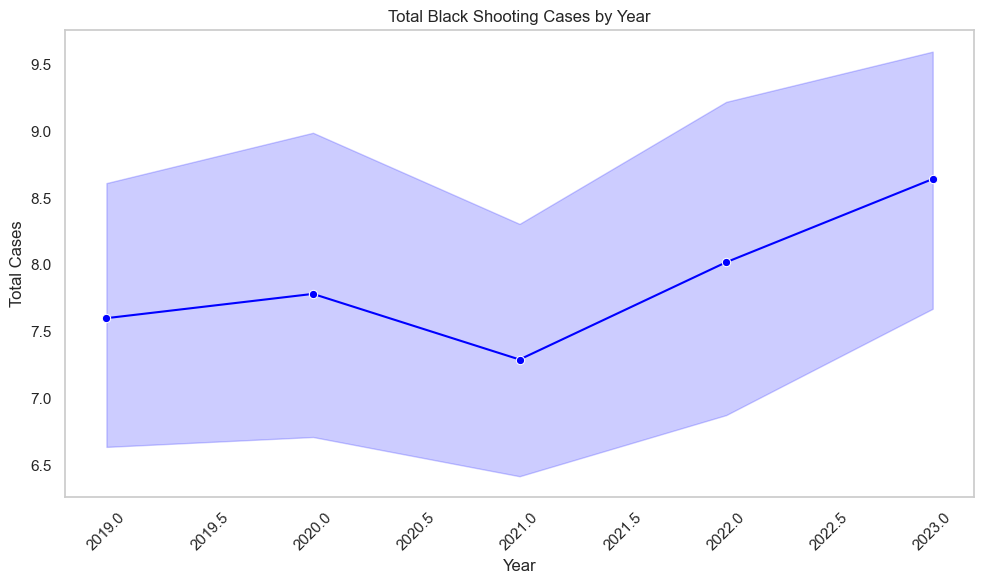

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='total_black_cases', data=bl, marker='o', color='blue')
plt.title('Total Black Shooting Cases by Year')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()